In [29]:
import os,sys
from dateutil.parser import parse
import numpy as np
from datetime import datetime
import time
from collections import Counter
import pandas as pd

sys.path.append("/Users/maithoma/work/python/")
from tm_python_lib import * 
from fitting_tools import *
from adaptive_kernel_tom import adaptive_kernel_quantile_pdf_tom

%matplotlib inline


sys.path.append("/Users/maithoma/work/github/bountyhunt/jupyter")

try:
    reload(bountylib)
except:
    import bountylib

from bountylib import *

df = loaddata()

In [148]:
np.median(df.Bounty.values)

250.0

In [144]:
np.mean(df.groupby([df.Researcher,df.Program]).count().Bounty.values)

1.8406026962727993

In [145]:
1.84 *180

331.2

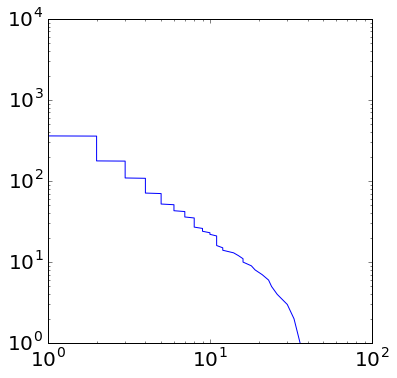

In [137]:
x,y = rankorder(df.groupby([df.Researcher,df.Program]).count().Bounty.values)
pl.loglog(x,y)

fit power law:  (0.79020330209124801, 0.42640143271122083, 22) 358.854286213
0.790203302091 0.426401432711 22


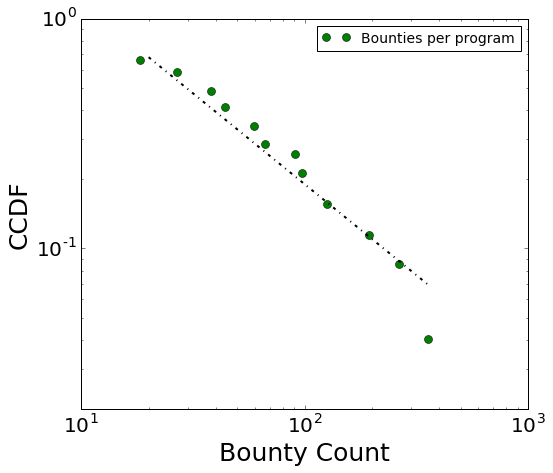

In [9]:
x,y = rankorder(df.Program.groupby(df.Program).count().values)
#x[x < 10] = 10
x = x + np.random.rand(len(y)) - 0.5
print "fit power law: ",pwlaw_fit_cont(x,20),np.max(x)
#pl.loglog(x,y,'o')
dic = plotPowerLawFit(x,xmin=20,continuousFit=True,addnoise=False,confint=.01,plot=False)

pl.figure(1,(8,7))
B = binning(dic['x'],dic['y'],40,log_10=True,confinter=5)
pl.loglog(10**B['bins'],10**B['mean'],'go',ms=8,label="Bounties per program")
pl.loglog(dic['xFit'],dic['yFit']*0.7,'k-.',lw=2)#,color='red',label="Fit Bounties per program per developer")
pl.xlabel("Bounty Count")
pl.ylabel("CCDF")
pl.xlim(xmin=10)
pl.ylim(ymin=0.02)
pl.legend(loc=0)
pl.savefig(figuredir + "bounty_programs_ccdf.eps")

LinregressResult(slope=-0.01744125524538322, intercept=0.013560023016582046, rvalue=-0.9943895804896975, pvalue=8.4948756475284611e-33, stderr=0.00032798112414325875)
57.3353228269


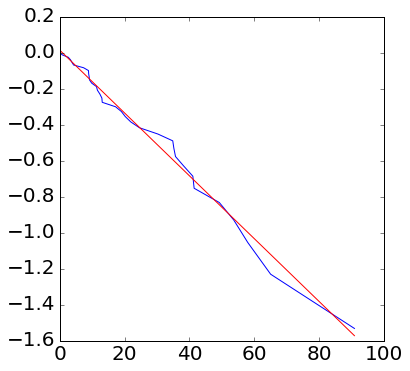

In [10]:
dtProgLaunch = []

for program in df.Program.unique():
    dtProgLaunch = np.append(dtProgLaunch,df.timestamp[df.Program == program][0])
    #print program,dtProgLaunch[-1]
    
x,y = rankorder(np.diff(dtProgLaunch/3600/24.))
y = y/float(y[-1])
c = y > 0
ly = np.log10(y[c])
fit = S.linregress(x[c],ly)
print fit
pl.plot(x,ly)
pl.plot(np.sort(x),np.sort(x)*fit[0] + fit[1],'r-')


print 1/-fit[0]

In [ ]:
dtResearcherStart = []
for researcher in df.Researcher.unique():
    dtResearcherStart = np.append(dtResearcherStart,df.index[df.Researcher == researcher][0])
    #print researcher,dtResearcherStart[-1]
    
    
x = dtResearcherStart
y = np.arange(1,len(x)+1)
pl.figure(1,(20,5))
pl.plot(x,y,'-')

$t^{-0.3} * t^{1.3} = t^{-0.3 + 1.3} = t$

In [ ]:
XinitTsp = np.array([time.mktime(t.timetuple()) for t in Xinit])
#print np.diff(XinitTsp/3600/24.)
x,y = rankorder(np.diff(XinitTsp/3600/24./30.))
y = y/float(y[-1])
c = (x>0)*(y>0)
lx = np.log10(x[c])
ly = np.log10(y[c])

fit = S.linregress(x[c],ly)
print fit
pl.plot(x[c],ly,'o')
pl.plot(x[c],x[c]*fit[0]+fit[1],'r-')

In [ ]:
Xdiff = Xdiff + np.random.rand(len(Xdiff)) - 0.5
x,y = rankorder(Xdiff)
c = (x>0)*(y>0)
lx = np.log10(x)
ly = np.log10(y)

fit = S.linregress(x,ly)
print fit
pl.plot(x,ly,'.')
pl.plot(x,x*fit[0]+fit[1],'k-')

### Bounties per Researcher

0.484794559759 0.4472135955 20
1.18284239687 0.230940107676 75
1.292044579 0.251976315339 63
0.790151504251 0.426401432711 22
1.1957608986 0.150329205601 177
1.63040585039 0.0693375245282 832


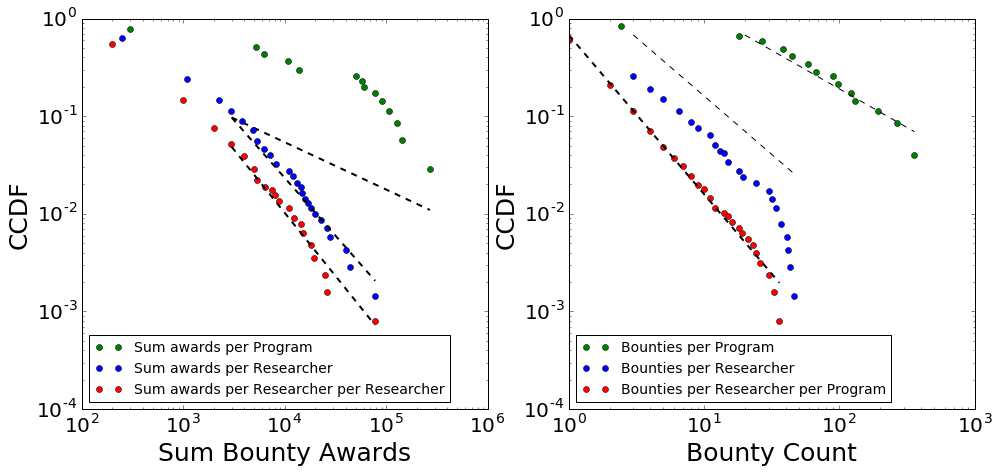

In [11]:
bountyPerResearcher(df)

1.62141505295 0.0701862406344 812


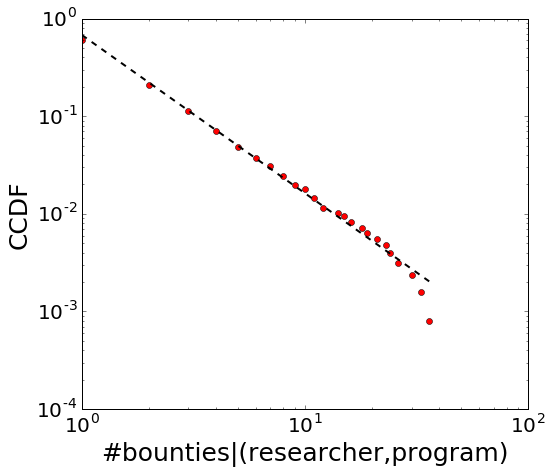

In [47]:
    '''Bounty Count per Researcher per Program'''
    pl.figure(1,(8,7))
    loss = df.Bounty.groupby([df.Program,df.Researcher]).count().values
    dic = plotPowerLawFit(loss,xmin=1,addnoise=True,confint=0)
    B = binning(dic['x'],dic['y'],40,log_10=True,confinter=5)
    pl.loglog(10**B['bins'],10**B['mean'],'ro',label="Bounties per Researcher per Program")
    #pl.loglog(dic['x'],dic['y'],'.',color='red',alpha=0.5,label="Bounties per program per Researcher")
    pl.loglog(dic['xFit'],dic['yFit']*0.7,'k--',lw=2)#,color='red',label="Fit Bounties per program per Researcher")
    pl.xlabel("#bounties|(researcher,program)")
    pl.ylabel("CCDF")    
    pl.savefig(figuredir + "ccdf_bounty_researcher_program.eps")

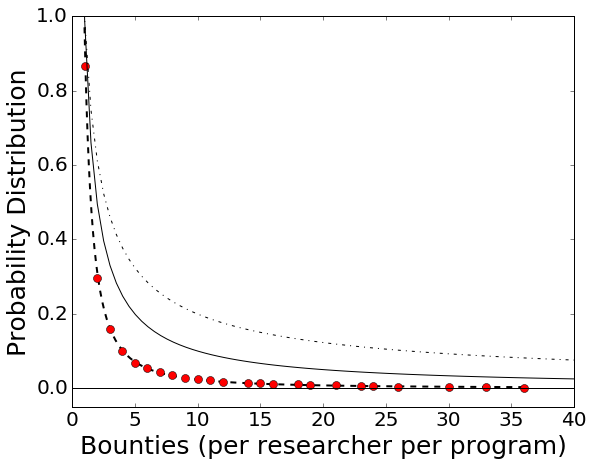

In [78]:
pl.figure(2,(9,7))
xH = np.linspace(0,50,100)
pl.plot(dic['xFit'],dic['yFit'],'k--',lw=2)
pl.plot(10**B['bins'],1/0.7*10**B['mean'],'ro',ms=8,label="Bounties per Researcher per Program")
pl.plot(xH,xH**-1,'k-')
pl.plot(xH,xH**-0.7,'k-.')
yH = np.zeros_like(xH)
pl.plot(xH,yH,'k-')
pl.xlabel("Bounties (per researcher per program)")
pl.ylabel("Probability Distribution")
pl.ylim(-0.05,1)
pl.xlim(xmax=40)
pl.savefig(figuredir + "ccdf_bounty_researcher_program_linlin_cisac_pres.eps")

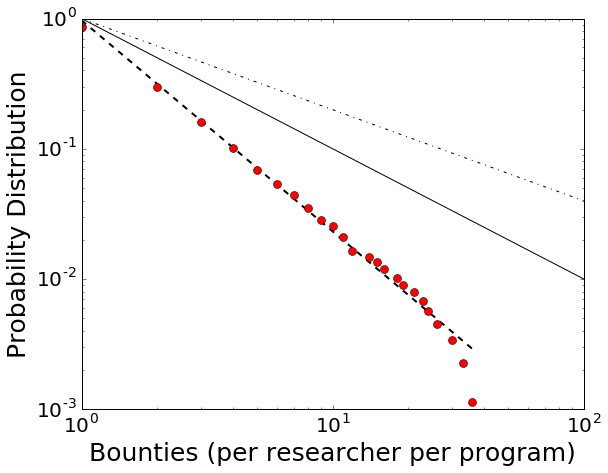

In [79]:
pl.figure(2,(9,7))
xH = np.linspace(0,100,100)
pl.loglog(dic['xFit'],dic['yFit'],'k--',lw=2)
pl.loglog(10**B['bins'],1/0.7*10**B['mean'],'ro',ms=8,label="Bounties per Researcher per Program")
pl.loglog(xH,xH**-1,'k-')
pl.loglog(xH,xH**-0.7,'k-.')
yH = np.zeros_like(xH)
pl.plot(xH,yH,'k-')
pl.xlabel("Bounties (per researcher per program)")
pl.ylabel("Probability Distribution")
pl.ylim(10*10**-4,1)
pl.xlim(1,100)
pl.savefig(figuredir + "ccdf_bounty_researcher_program_loglog_cisac_pres.eps")

0.924279525416 0.471404520791 18


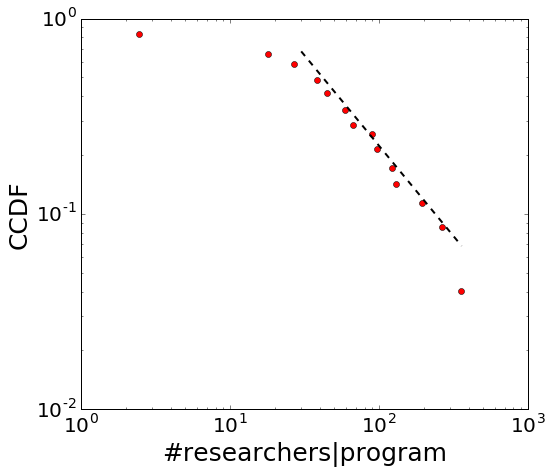

In [37]:
'''Researcher Count per Program'''
pl.figure(1,(8,7))
loss = df.Researcher.groupby(df.Program).count().values
dic = plotPowerLawFit(loss,xmin=30,addnoise=True,confint=0)
B = binning(dic['x'],dic['y'],40,log_10=True,confinter=5)
pl.loglog(10**B['bins'],10**B['mean'],'ro',label="Bounties per Researcher per Program")
#pl.loglog(dic['x'],dic['y'],'.',color='red',alpha=0.5,label="Bounties per program per Researcher")
pl.loglog(dic['xFit'],dic['yFit']*0.7,'k--',lw=2)#,color='red',label="Fit Bounties per program per Researcher")
pl.xlabel("#researchers|program")
pl.ylabel("CCDF")
pl.savefig(figuredir + "ccdf_researchers_program.eps")

0.789629731245 0.426401432711 22


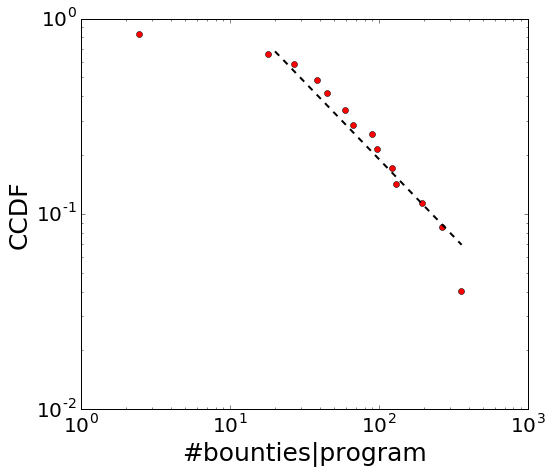

In [36]:
'''Bounty Count per Program'''
pl.figure(1,(8,7))
loss = df.Bounty.groupby([df.Program]).count().values
dic = plotPowerLawFit(loss,xmin=20,addnoise=True,confint=0)
B = binning(dic['x'],dic['y'],40,log_10=True,confinter=5)
pl.loglog(10**B['bins'],10**B['mean'],'ro',label="Bounties per Researcher per Program")
#pl.loglog(dic['x'],dic['y'],'.',color='red',alpha=0.5,label="Bounties per program per Researcher")
pl.loglog(dic['xFit'],dic['yFit']*0.7,'k--',lw=2)#,color='red',label="Fit Bounties per program per Researcher")
pl.xlabel("#bounties|program")
pl.ylabel("CCDF")
pl.savefig(figuredir + "ccdf_bounty_program.eps")

LinregressResult(slope=-0.68254782004918235, intercept=2.5613596717340128, rvalue=-0.94539876471105977, pvalue=3.3446108155009684e-09, stderr=0.05882522731760681)


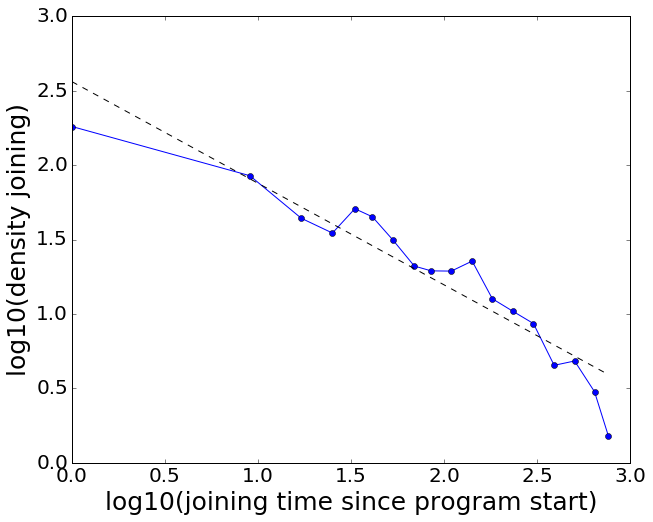

In [102]:
J = []
pl.figure(1,(10,8))
for program in df.Program.unique():

        dfprog = df[df.Program == program]
        rJoin = dfprog.timestamp.groupby([df.Program,df.Researcher]).min().values
        rJoin = rJoin/3600/24.
        rJoin = (rJoin - min(rJoin) + 1)
        J = np.append(J,rJoin)
        
H = pl.histogram(J,bins=100)
x = H[1][:-1]
y = H[0]
c = (x > 0)*(y>0)
lx = np.log10(x[c])
ly = np.log10(y[c])
B = binning(lx,ly,30)
fit = S.linregress(B['bins'],B['mean'])
print fit
pl.plot(B['bins'],B['mean'],'o-')
pl.plot(B['bins'],B['bins']*fit[0] + fit[1],'k--')
pl.legend(loc=0)
pl.xlabel("log10(joining time since program start)")
pl.ylabel("log10(density joining)")
pl.savefig(figuredir + "density_joining.eps")

In [100]:
0.68/1.68

0.4047619047619048

LinregressResult(slope=1.1255010800442207, intercept=0.030468287109193692, rvalue=0.99301731782552738, pvalue=2.7801526833102216e-16, stderr=0.033426874898500269)
LinregressResult(slope=1.1255010800442207, intercept=0.030468287109193692, rvalue=0.99301731782552738, pvalue=2.7801526833102216e-16, stderr=0.033426874898500269)


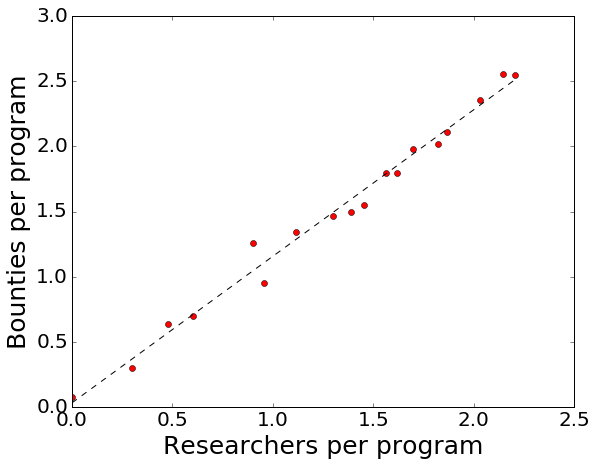

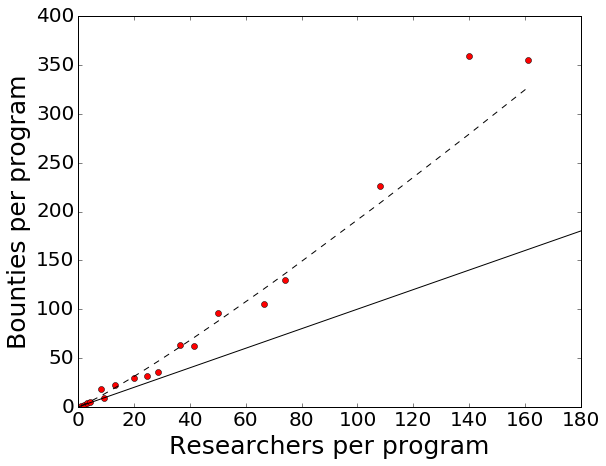

In [83]:
pl.figure(1,(9,7))

Bugs = []
Researchers = []

for program in df.Program.unique():
        dfprog = df[df.Program == program]
        bugs = len(dfprog)
        researchers = len(dfprog.groupby(df.Researcher).count()) 
        Bugs = np.append(Bugs,bugs)
        Researchers = np.append(Researchers,researchers)
        
        
c = (Bugs > 0)*(Researchers > 0)
lx = np.log10(Researchers[c])
ly = np.log10(Bugs[c])
B = binning(lx,ly,30)
fit = S.linregress(B['bins'],B['mean'])
print fit
pl.plot(B['bins'],B['mean'],'ro')
pl.plot(B['bins'],B['bins']*fit[0] + fit[1],'k--')

pl.xlabel("Researchers per program")
pl.ylabel("Bounties per program")
#pl.loglog(Researchers,Bugs,'o')
pl.savefig(figuredir + "scaling_bugs_vs_researchers_loglog.eps")


pl.figure(2,(9,7))

Bugs = []
Researchers = []

for program in df.Program.unique():
        dfprog = df[df.Program == program]
        bugs = len(dfprog)
        researchers = len(dfprog.groupby(df.Researcher).count()) 
        Bugs = np.append(Bugs,bugs)
        Researchers = np.append(Researchers,researchers)
        
        
c = (Bugs > 0)*(Researchers > 0)
lx = np.log10(Researchers[c])
ly = np.log10(Bugs[c])
B = binning(lx,ly,30)
fit = S.linregress(B['bins'],B['mean'])
print fit
#pl.plot(10**lx,10**ly,'bo')
pl.plot(10**B['bins'],10**B['mean'],'ro')
pl.plot(10**B['bins'],10**(B['bins']*fit[0] + fit[1]),'k--')
pl.plot(np.linspace(0,180,10),np.linspace(0,180,10),'k-')

pl.xlabel("Researchers per program")
pl.ylabel("Bounties per program")
#pl.loglog(Researchers,Bugs,'o')
pl.savefig(figuredir + "scaling_bugs_vs_researchers_linlin.eps")

CDF Bugs per researcher per program : $1/x^{1.61}$
CDF researchers per program : $1/x^{1.16}$

Bugs per program : $1/x^{1.61}$

115 109
LinregressResult(slope=1.2607962653548559, intercept=-0.16230001936164129, rvalue=0.97145632743220911, pvalue=1.0951234041660287e-68, stderr=0.029763105882338058)
LinregressResult(slope=1.0307742067236751, intercept=0.053371086324513817, rvalue=0.98105116232172518, pvalue=4.2557279195412304e-78, stderr=0.019679729770536485)


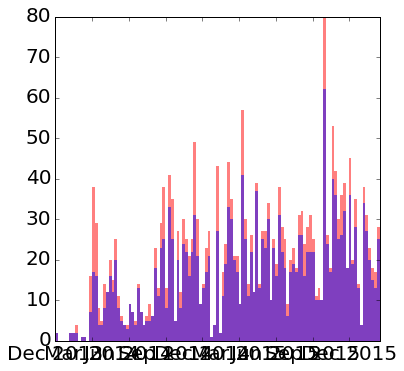

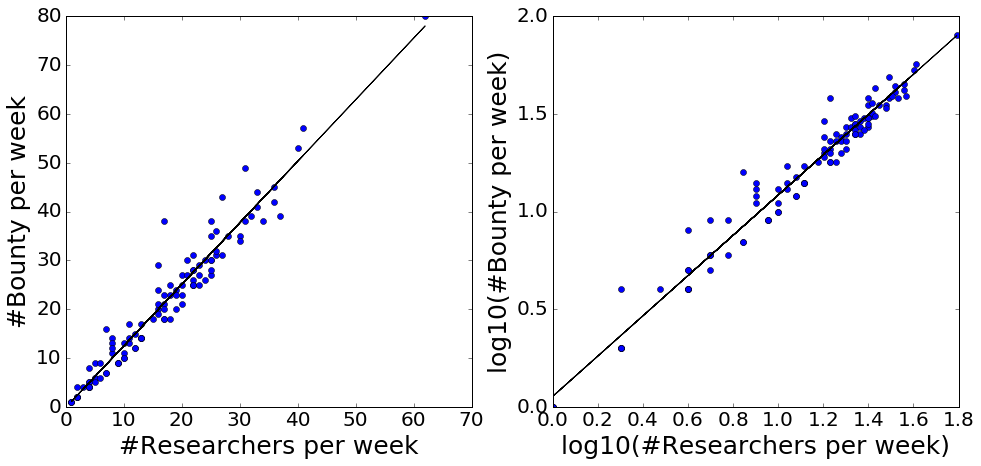

In [272]:
t_resol = "1W"
dBins = df.resample(t_resol).count().index
R = []
B = []

for d,dx in enumerate(dBins[:-1]):
    #print dx,dBins[d+1]
    R = np.append(R,len(df[(df.index  >= dx) & (df.index  < dBins[d+1])].groupby(df.Researcher).count()))
    B = np.append(B,len(df[(df.index  >= dx) & (df.index  < dBins[d+1])]))
    #print R[-1],B[-1]
    
pl.figure(1)
pl.bar(dBins[:-1],B,width=7,lw=0,alpha= 0.5,color="red")
pl.bar(dBins[:-1],R,width=7,lw=0,alpha= 0.5,color="blue")

pl.figure(2,(16,7))
c = (B >= R)*(R > 0)
print len(B),len(B[c])

pl.subplot(121)
fitLin = S.linregress(R[c],B[c])
print fitLin
pl.plot(R[c],B[c],'o')
pl.plot(R[c],R[c]*fitLin[0] + fitLin[1],'k-')
pl.xlabel("#Researchers per week")
pl.ylabel("#Bounty per week")


pl.subplot(122)
lx = np.log10(R[c])
ly = np.log10(B[c])
fitScaling = S.linregress(lx,ly)
print fitScaling
pl.plot(lx,ly,'o')
pl.plot(lx,lx*fitScaling[0] + fitScaling[1],'k-')
pl.xlabel("log10(#Researchers per week)")
pl.ylabel("log10(#Bounty per week)")

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()


<Container object of 116 artists>

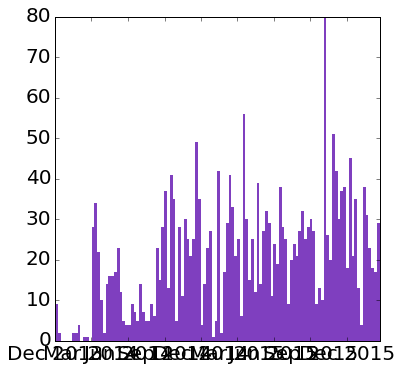

In [243]:
t_resol = "1W"
#ax = pl.figure(1,(20,5))
#color = ['yellow','cyan','green','lime','red','magenta','purple','blue','grey']
x = df.Bounty.resample(t_resol,how="count").index
yR = df.Bounty.resample(t_resol,how="count").values
yB = df.Researcher.resample(t_resol,how="count").values
pl.bar(x,yB,width=7,lw=0,alpha= 0.5,color="red")
pl.bar(x,yR,width=7,lw=0,alpha= 0.5,color="blue")

## Awards as a function of award rank (by researcher)

1.25892541179
LinregressResult(slope=1.2395182027135159, intercept=2.3228106475157437, rvalue=0.99820727047574975, pvalue=2.4832532149811121e-33, stderr=0.014575489839067096)
1.25892541179
LinregressResult(slope=1.2395182027135159, intercept=2.3228106475157437, rvalue=0.99820727047574975, pvalue=2.4832532149811121e-33, stderr=0.014575489839067096)
mean:  LinregressResult(slope=-0.3121869564909277, intercept=1.5431554291982006, rvalue=-0.60266218090605916, pvalue=0.00054061125411206795, stderr=0.079553607642434646)
npoints:  LinregressResult(slope=-1.0481357230611581, intercept=2.5730877000181405, rvalue=-0.92054406879363415, pvalue=1.561231094112002e-12, stderr=0.085598539804281878)


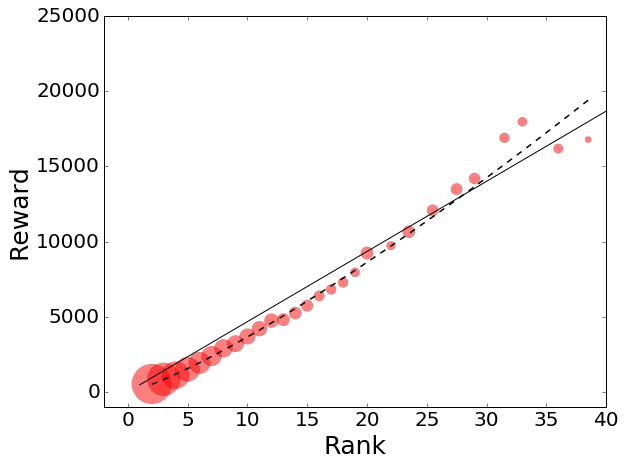

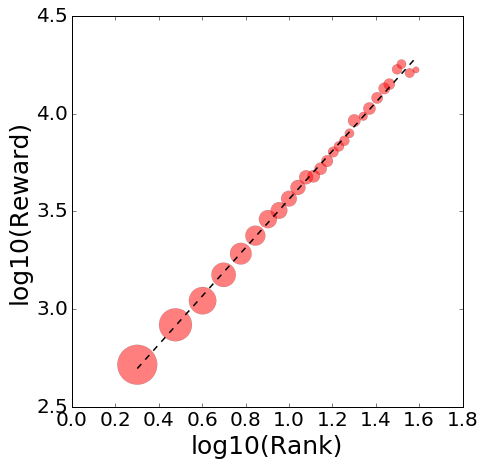

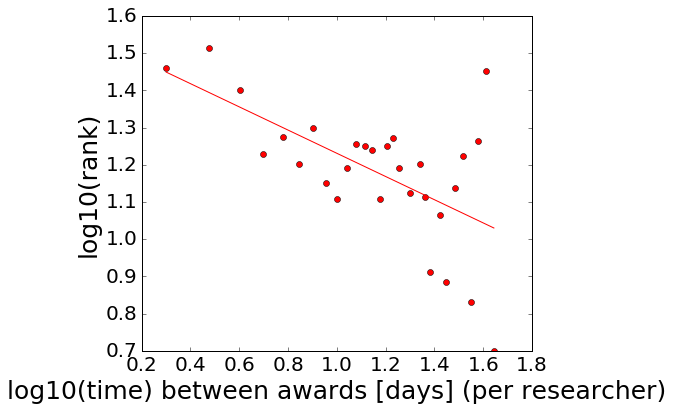

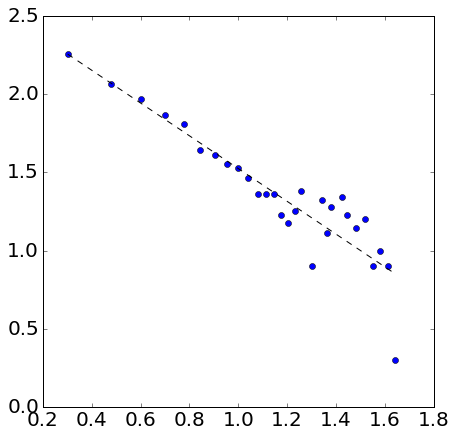

In [122]:
Rewards = []
Ranks = []
diffSubmit = []

for researcher in df.Researcher.unique():
    bTstamp = df[df.Researcher == researcher].timestamp.values
    bDates = df[df.Researcher == researcher].Bounty.index
    bounties = df[df.Researcher == researcher].Bounty.values
    rank = np.arange(1,len(bounties)+1)
    
    Rewards = np.append(Rewards,np.cumsum(bounties))
    Ranks = np.append(Ranks,rank)
    diffSubmit = np.append(diffSubmit,bTstamp)


pl.figure(1,(9,7))
avgtype = "mean"

xmin = 10**0.1
print xmin
c = (Ranks >= xmin)*(Ranks < 10**1.6)
lx = np.log10(Ranks[c])
ly = np.log10(Rewards[c])
B = binning(lx,ly,50)
#B = binning(Ranks[c],ly,50)
fit = S.linregress(B['bins'],B[avgtype])
print fit
#pl.semilogy(Ranks,Rewards,'.')
#pl.plot(B['bins'],B[avgtype],'ro')
pl.scatter(10**B['bins'],10**B[avgtype],s=5*B['nPoints'],alpha=0.5,color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(10**B['bins'],10**(B['bins']*fit[0]+fit[1]),'k--',lw=1.5)
pl.plot(np.linspace(1,40,10),np.linspace(1,40,10)*467,'k-')
#pl.xlim(xmin=-5)
#pl.ylim(ymin=2)
pl.xlabel("Rank")
pl.ylabel("Reward")
pl.xlim(-2,40)
pl.ylim(ymin=-1000)

pl.savefig(figuredir + "scaling_SumRewards_Researchers_All_linlin.eps")
    
    
pl.figure(3,(7,7))
avgtype = "mean"

xmin = 10**0.1
print xmin
c = (Ranks >= xmin)*(Ranks < 10**1.6)
lx = np.log10(Ranks[c])
ly = np.log10(Rewards[c])
B = binning(lx,ly,50)
#B = binning(Ranks[c],ly,50)
fit = S.linregress(B['bins'],B[avgtype])
print fit
#pl.semilogy(Ranks,Rewards,'.')
#pl.plot(B['bins'],B[avgtype],'ro')
pl.scatter(B['bins'],B[avgtype],s=5*B['nPoints'],alpha=0.5,color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k--',lw=1.5)
#pl.xlim(xmin=-5)
#pl.ylim(ymin=2)
pl.xlabel("log10(Rank)")
pl.ylabel("log10(Reward)")

pl.savefig(figuredir + "scaling_SumRewards_Researchers_All.eps")





xdftime = Ranks[:-1]
ydftime = np.diff(diffSubmit/3600./24.)
c = (ydftime > 1)*(xdftime > 1)
B = binning(xdftime[c],ydftime[c],50)
#pl.semilogy(xdftime[c],ydftime[c],'o')

lx = np.log10(xdftime[c])
ly = np.log10(ydftime[c])

pl.figure(4,(7,6))
B = binning(lx,ly,50,confinter=25)
fit = S.linregress(B['bins'],B['mean'])
print "mean: ", fit
pl.plot(B['bins'],B['mean'],'ro')
#pl.plot(B['bins'],B['percUp'],'r-.')
#pl.plot(B['bins'],B['percDown'],'r-.')
pl.plot(B['bins'],B['bins']*fit[0] + fit[1],'r-')
pl.ylabel("log10(rank)")
pl.xlabel("log10(time) between awards [days] (per researcher)")
pl.savefig(figuredir + "intertime_awards.eps")

pl.figure(5,(7,7))
lx = B['bins']
ly = np.log10(B['nPoints'])

fit = S.linregress(lx,ly)
print "npoints: ",fit
pl.plot(lx,ly,'o')
pl.plot(lx,lx*fit[0] + fit[1],'k--')





In [1175]:
0.9205440**2

0.847401255936

## Awards as a function of award rank (by program)

LinregressResult(slope=1.266705387068801, intercept=2.0816607588231477, rvalue=0.99738402984585151, pvalue=1.5650621151561185e-41, stderr=0.015517664726954842)


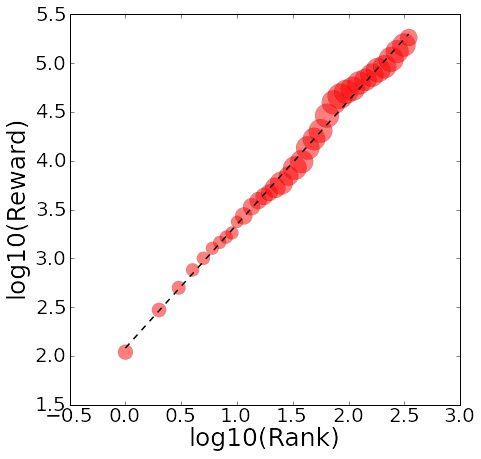

In [1096]:
Rewards = []
Ranks = []
diffSubmit = []
Researchers = []
Bounties = []
RanksProg = []

for program in df.Program.unique():
    bTstamp = df[df.Program == program].timestamp.values
    bDates = df[df.Program == program].Bounty.index
    bounties = df[df.Program == program].Bounty.values
    rank = np.arange(1,len(bounties)+1)
    
    Researchers = np.append(Researchers,len(df[df.Program == program].Researcher.unique()))
    Bounties = np.append(Bounties,len(bounties))
    Rewards = np.append(Rewards,np.cumsum(bounties))
    Ranks = np.append(Ranks,rank)
    RanksProg = np.append(RanksProg,rank[-1])
    diffSubmit = np.append(diffSubmit,bTstamp)


pl.figure(3,(7,7))
c = Ranks < 10000
lx = np.log10(Ranks[c])
ly = np.log10(Rewards[c])
B = binning(lx,ly,50)
fit = S.linregress(B['bins'],B[avgtype])
print fit
pl.scatter(B['bins'],B[avgtype],s=5*B['nPoints'],alpha=0.5,color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k--',lw=1.5)
pl.xlabel("log10(Rank)")
pl.ylabel("log10(Reward)")

LinregressResult(slope=1.1025841917841828, intercept=0.039368544807909744, rvalue=0.98686559649778327, pvalue=1.0431685938601243e-27, stderr=0.03141855480513938)


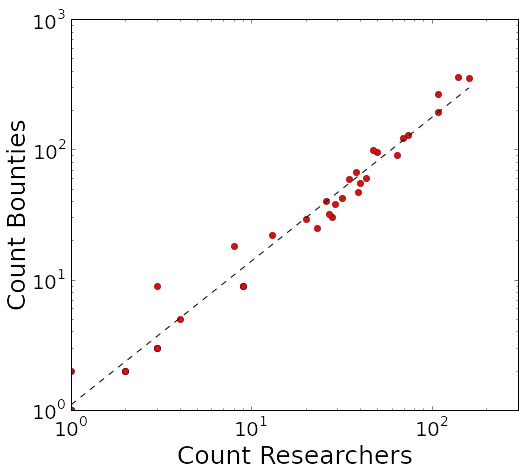

In [1111]:
lx = np.log10(Researchers)
ly = np.log10(Bounties)

fit = S.linregress(lx,ly)
print fit

pl.figure(2,(8,7))
pl.loglog(10**lx,10**ly,'ro')
pl.loglog(10**np.sort(lx),10**(np.sort(lx)*fit[0] + fit[1]),'k--')
pl.xlabel("Count Researchers")
pl.ylabel("Count Bounties")
pl.xlim(xmax=300)
pl.savefig(figuredir + "scaling_bounty_researchers.eps")

fit power law:  (0.79074378968106962, 0.42640143271122083, 22) 358.772471859
0.790743789681 0.426401432711 22
fit power law:  (1.1604819899259424, 0.43643578047198478, 21) 161.271372502
1.16048198993 0.436435780472 21


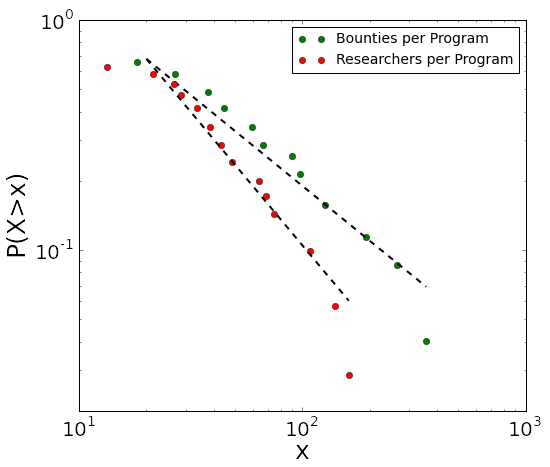

In [1122]:
x,y = rankorder(RanksProg)
x = x + np.random.rand(len(y)) - 0.5
print "fit power law: ",pwlaw_fit_cont(x,20),np.max(x)
#pl.loglog(x,y,'o')
dic = plotPowerLawFit(x,xmin=20,continuousFit=True,addnoise=False,confint=.01,plot=False)

pl.figure(1,(8,7))

B = binning(dic['x'],dic['y'],40,log_10=True,confinter=5)
pl.loglog(10**B['bins'],10**B['mean'],'go',label="Bounties per Program")
pl.loglog(dic['xFit'],dic['yFit']*0.7,'k--',lw=2)#,color='red',label="Fit Bounties per program per developer")


x,y = rankorder(Researchers)
x = x + np.random.rand(len(y)) - 0.5
print "fit power law: ",pwlaw_fit_cont(x,20),np.max(x)
#pl.loglog(x,y,'o')
dic = plotPowerLawFit(x,xmin=20,continuousFit=True,addnoise=False,confint=.01,plot=False)

B = binning(dic['x'],dic['y'],40,log_10=True,confinter=5)
pl.loglog(10**B['bins'],10**B['mean'],'ro',label="Researchers per Program")
pl.loglog(dic['xFit'],dic['yFit']*0.7,'k--',lw=2)#,color='red',label="Fit Bounties per program per developer")


pl.xlabel("x")
pl.ylabel("P(X>x)")
pl.legend(loc=0)
pl.xlim(xmin=10)
pl.ylim(ymin=0.02)
pl.savefig(figuredir + "ccdf_bounties_and_researchers_per_program.eps")

LinregressResult(slope=-0.0039261897790118291, intercept=-0.03301217968909631, rvalue=-0.99646134510619677, pvalue=5.4750613497186128e-23, stderr=7.4053466374511266e-05)
254.699863299


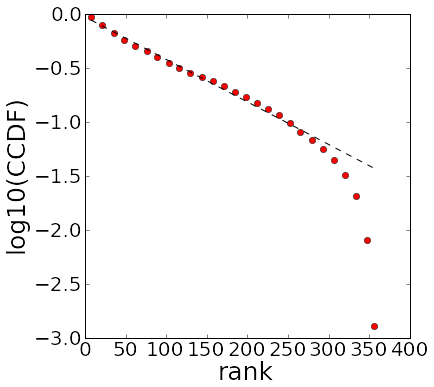

In [1062]:
x,y = rankorder(Ranks)
y = y/float(y[-1])
#c = (x < 300)*(y>0)
ly = np.log10(y)

B = binning(x,ly,30)
c = B['bins'] < 300
fit = S.linregress(B['bins'][c],B['mean'][c])
print fit

#pl.plot(x,ly,'-')
pl.plot(B['bins'],B['mean'],'ro')
pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k--')

#pl.ylim(1,)
pl.xlabel("rank")
pl.ylabel("log10(CCDF)")

print 1/-fit[0]
pl.savefig(figuredir + "CCDF_")

fit power law:  (1.4843488432077188, 0.1889822365046136, 112) 357.198451873


(5.0911218673314407, 14.51704333247241)

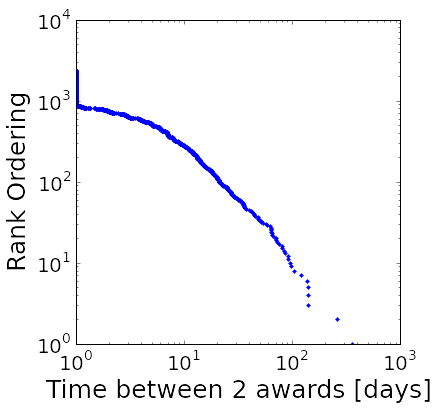

In [878]:
x,y = rankorder(np.diff(diffSubmit)/3600./24.)
x[x < 1] = 1
pl.loglog(x,y,'.')
x = x + np.random.rand(len(y)) - 0.5
print "fit power law: ",pwlaw_fit_cont(x,20),np.max(x)
pl.xlabel("Time between 2 awards [days]")
pl.ylabel("Rank Ordering")

np.mean(x),np.std(x)

In [87]:
def RankRewards(df,program):

    dfprog = df[df.Program == program]
  
    bTstamp = dfprog.timestamp.values
    bDates = dfprog.Bounty.index
    bounties = dfprog.Bounty.values
    rank = np.arange(1,len(bounties)+1)
    return {'ranks':rank,'rewards':np.cumsum(bounties),'deltaAward':bTstamp}


def RankRewardsResearchers(df,program):

    dfprog = df[df.Program == program]
    
    Rewards = []
    Ranks = []
    diffSubmit = []

    for researcher in dfprog.Researcher.unique():
        bTstamp = dfprog[df.Researcher == researcher].timestamp.values
        bDates = dfprog[df.Researcher == researcher].Bounty.index
        bounties = dfprog[df.Researcher == researcher].Bounty.values
        rank = np.arange(1,len(bounties)+1)

        Rewards = np.append(Rewards,np.cumsum(bounties))
        Ranks = np.append(Ranks,rank)
        diffSubmit = np.append(diffSubmit,bTstamp)
    
    return {'ranks':Ranks,'rewards':Rewards,'deltaAward':diffSubmit}


## Awards as a function of award rank (by program)

158.489319246
LinregressResult(slope=1.2764058302818753, intercept=2.2857184078022703, rvalue=0.99031009548906401, pvalue=1.2654425635075966e-18, stderr=0.040024203374272704)


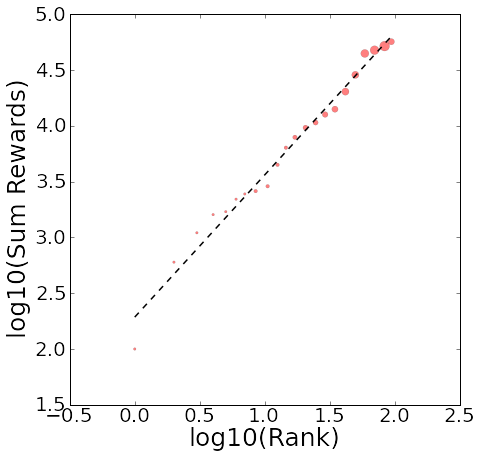

In [895]:
dic = RankRewards(df,'Ubiquiti Networks')
avgtype = "mean"

Ranks = dic['ranks']
Rewards = dic['rewards']
c = Ranks < 10**5.2
print 10**2.2
lx = np.log10(Ranks[c])
ly = np.log10(Rewards[c])
#B = binning(Ranks[c],Rewards[c],30)
B = binning(lx,ly,30)

pl.figure(1,(7,7))

fit = S.linregress(B['bins'],B[avgtype])
print fit
#pl.semilogy(Ranks,Rewards,'.')
#pl.plot(B['bins'],B[avgtype],'ro')
pl.scatter(B['bins'],B[avgtype],s=5*B['nPoints'],alpha=0.5,color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k--',lw=1.5)

pl.xlabel("log10(Rank)")
pl.ylabel("log10(Sum Rewards)")


## Awards as a function of award rank (by program by researcher)

158.489319246
LinregressResult(slope=1.3462454982593026, intercept=2.4417036965302104, rvalue=0.99465341681979025, pvalue=3.4708032517794232e-10, stderr=0.046591116404460918)


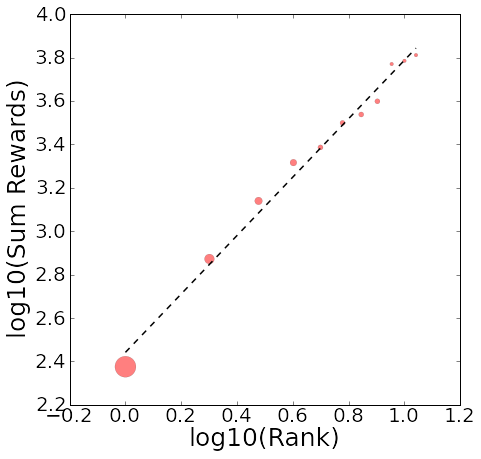

In [896]:
pl.figure(3,(7,7))

dic = RankRewardsResearchers(df,'VK.com')

avgtype = "mean"

Ranks = dic['ranks']
Rewards = dic['rewards']
c = Ranks < 10**2.2
print 10**2.2
lx = np.log10(Ranks[c])
ly = np.log10(Rewards[c])
#B = binning(lx,ly,30)
B = binning(lx,ly,100)
fit = S.linregress(B['bins'],B[avgtype])
print fit
#pl.semilogy(Ranks,Rewards,'.')
#pl.plot(B['bins'],B[avgtype],'ro')
pl.scatter(B['bins'],B[avgtype],s=5*B['nPoints'],alpha=0.5,color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k--',lw=1.5)

pl.xlabel("log10(Rank)")
pl.ylabel("log10(Sum Rewards)")

$B \sim h^{1.1} \rightarrow P(X>x = B|h) = ??$

$P(X > x = h) \sim x^{-1.16}$

$P(X > x = B) \sim (x^{1.1})^{-1.16}$

LinregressResult(slope=1.270349362265667, intercept=2.075235941246357, rvalue=0.99626416353977887, pvalue=1.3290703686465626e-66, stderr=0.014098947103078652)
npoints:  LinregressResult(slope=0.13280664911455586, intercept=1.3349536775097797, rvalue=0.6398229786940357, pvalue=1.6482881731881423e-08, stderr=0.020424505620768182)


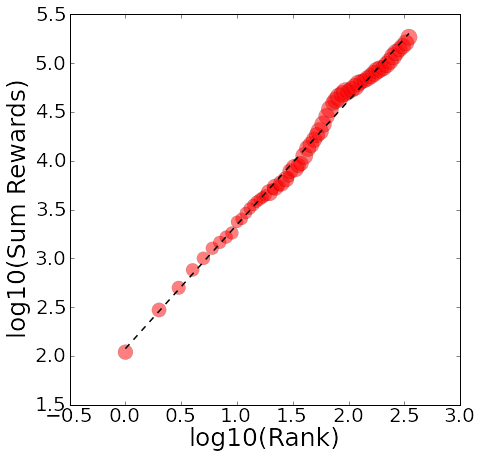

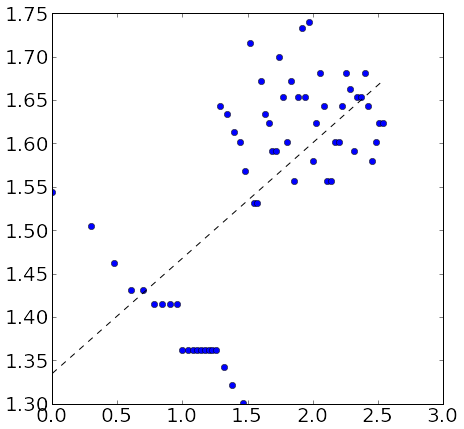

In [1179]:
pl.figure(3,(7,7))

Ranks = []
Rewards = []

for program in df.Program.unique():
    dic = RankRewards(df,program)
    Ranks = np.append(Ranks,dic['ranks'])
    Rewards = np.append(Rewards,dic['rewards'])

c = Ranks < 10**5.2
lx = np.log10(Ranks[c])
ly = np.log10(Rewards[c])
#B = binning(lx,ly,30)
B = binning(lx,ly,100)
fit = S.linregress(B['bins'],B[avgtype])
print fit
#pl.semilogy(Ranks,Rewards,'.')
#pl.plot(B['bins'],B[avgtype],'ro')
pl.scatter(B['bins'],B[avgtype],s=5*B['nPoints'],alpha=0.5,color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k--',lw=1.5)

pl.xlabel("log10(Rank)")
pl.ylabel("log10(Sum Rewards)")

pl.savefig(figuredir + "scaling_SumRewards_Programs_All.eps")

pl.figure(4,(7,7))
lx = B['bins']
ly = np.log10(B['nPoints'])

fit = S.linregress(lx,ly)
print "npoints: ",fit
pl.plot(lx,ly,'o')
pl.plot(lx,lx*fit[0] + fit[1],'k--')


In [1180]:
0.6398229786940357**2

0.40937344406490844

LinregressResult(slope=1.4011266204153068, intercept=2.3074214795498174, rvalue=0.99436000492912413, pvalue=9.6508688680100786e-34, stderr=0.026014645189795852)
npoints:  LinregressResult(slope=-1.852770179810544, intercept=3.1791229072243734, rvalue=-0.98556207653970729, pvalue=4.9232215483879498e-27, stderr=0.055408284045459527)


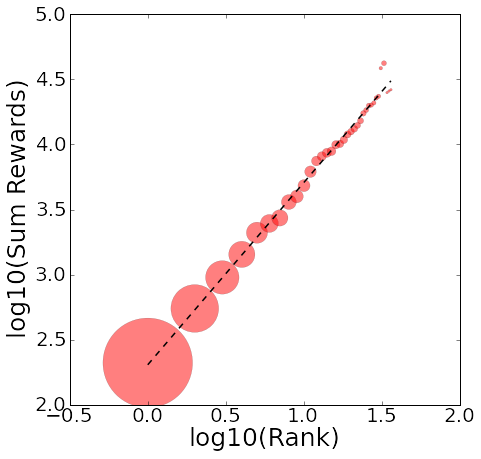

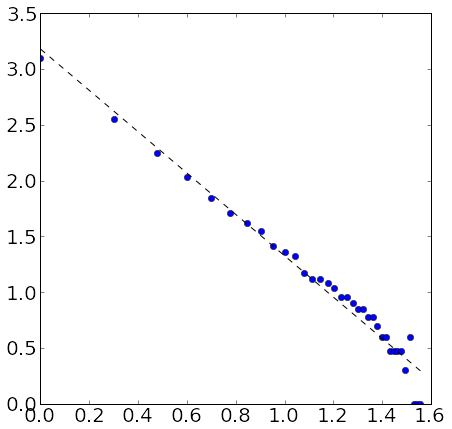

In [1170]:
pl.figure(3,(7,7))

Ranks = []
Rewards = []

for program in df.Program.unique():
    dic = RankRewardsResearchers(df,program)
    Ranks = np.append(Ranks,dic['ranks'])
    Rewards = np.append(Rewards,dic['rewards'])

c = Ranks < 10**5.2
lx = np.log10(Ranks[c])
ly = np.log10(Rewards[c])
#B = binning(lx,ly,30)
B = binning(lx,ly,100)
fit = S.linregress(B['bins'],B[avgtype])
print fit
#pl.semilogy(Ranks,Rewards,'.')
#pl.plot(B['bins'],B[avgtype],'ro')
pl.scatter(B['bins'],B[avgtype],s=5*B['nPoints'],alpha=0.5,color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k--',lw=1.5)

pl.xlabel("log10(Rank)")
pl.ylabel("log10(Sum Rewards)")

pl.savefig(figuredir + "scaling_SumRewards_Programs_Researchers_All.eps")

pl.figure(4,(7,7))
lx = B['bins']
ly = np.log10(B['nPoints'])

fit = S.linregress(lx,ly)
print "npoints: ",fit
pl.plot(lx,ly,'o')
pl.plot(lx,lx*fit[0] + fit[1],'k--')


LinregressResult(slope=1.4011266204153068, intercept=2.3074214795498174, rvalue=0.99436000492912413, pvalue=9.6508688680100786e-34, stderr=0.026014645189795852)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


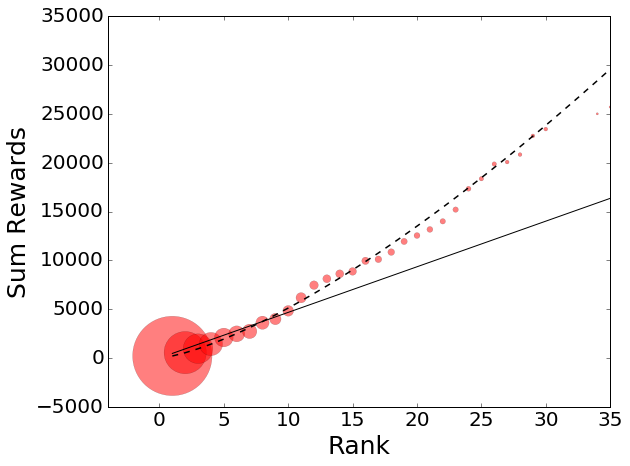

In [120]:
pl.figure(3,(9,7))
Ranks = []
Rewards = []

for program in df.Program.unique():
    dic = RankRewardsResearchers(df,program)
    Ranks = np.append(Ranks,dic['ranks'])
    Rewards = np.append(Rewards,dic['rewards'])

c = Ranks < 10**5.2
lx = np.log10(Ranks[c])
ly = np.log10(Rewards[c])
#B = binning(lx,ly,30)
B = binning(lx,ly,100)
fit = S.linregress(B['bins'],B[avgtype])
print fit
#pl.semilogy(Ranks,Rewards,'.')
#pl.plot(B['bins'],B[avgtype],'ro')
pl.scatter(10**B['bins'],10**B[avgtype],s=5*B['nPoints'],alpha=0.5,color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(10**B['bins'],10**(B['bins']*fit[0]+fit[1]),'k--',lw=1.5)
pl.plot(np.linspace(1,40,10),np.linspace(1,40,10)*467,'k-')
#pl.xlabel("log10(Rank)")
#pl.ylabel("log10(Sum Rewards)")

pl.xlabel("Rank")
pl.ylabel("Sum Rewards")
pl.xlim(-4,35)
pl.ylim(-5000,35000)

pl.savefig(figuredir + "scaling_SumRewards_Programs_Researchers_All_linlin.eps")

LinregressResult(slope=-0.40319685651658282, intercept=0.15765714726582319, rvalue=-0.89096061521183056, pvalue=1.0577920067663467e-09, stderr=0.04194555529050413)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()


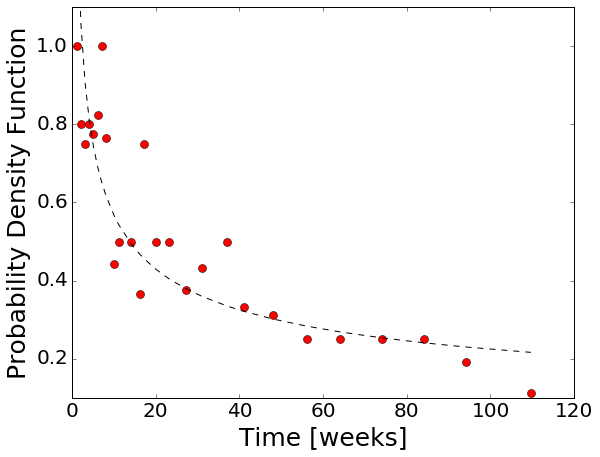

In [27]:
t_resol = "1W"

pl.figure(2,(9,7))

Xall = []
Yall = []

Xmax = []
Xinit = []
Xdiff = []

for program in df.Program.unique():
    #print program
    dfprog = df[df.Program == program]
    countBountiesProg = dfprog.Bounty.resample(t_resol,how="count")
    Y = countBountiesProg.values
    i0 = np.argmax(Y)
    Xmax = np.append(Xmax,countBountiesProg.index[i0])
    Xinit = np.append(Xinit,countBountiesProg.index[0])
    Xdiff = np.append(Xdiff, (countBountiesProg.index[i0] - countBountiesProg.index[0]).days)
    X = (countBountiesProg.index - countBountiesProg.index[0]).days + 1
    #Y = Y/float(max(Y))
    Y = Y/float(Y[0])


    Xall = np.append(Xall,X)
    Yall = np.append(Yall,Y)

    c = (X > 0)*(Y > 0)
    lX = np.log10(X[c])
    lY = np.log10(Y[c])

    #pl.plot(lX,lY,label=program)

Xall = Xall/7.
c = (Xall > 0)*(Yall > 0)*(Xall < 3000)
lXall = np.log10(Xall[c])
lYall = np.log10(Yall[c])

B = binning(lXall,lYall,50,confinter=10)
Blin = binning(Xall[c],Yall[c],50,confinter=10)

#oB = np.argmax(B['median'])
#print B['bins']
#print B['median']
fit = S.linregress(B['bins'],B['median'])
print fit
pl.plot(10**B['bins'],10**B['median'],'ro',ms=8)
#pl.plot(B['bins'],B['percUp'],'r--')
#pl.plot(B['bins'],B['percDown'],'r--')
pl.plot(10**B['bins'],10**(B['bins']*fit[0] + fit[1]),'k--')

pl.ylim(0.1,1.1)
pl.xlabel("Time [weeks]")
pl.ylabel("Probability Density Function")
pl.savefig(figuredir + "decay_linlin.eps")

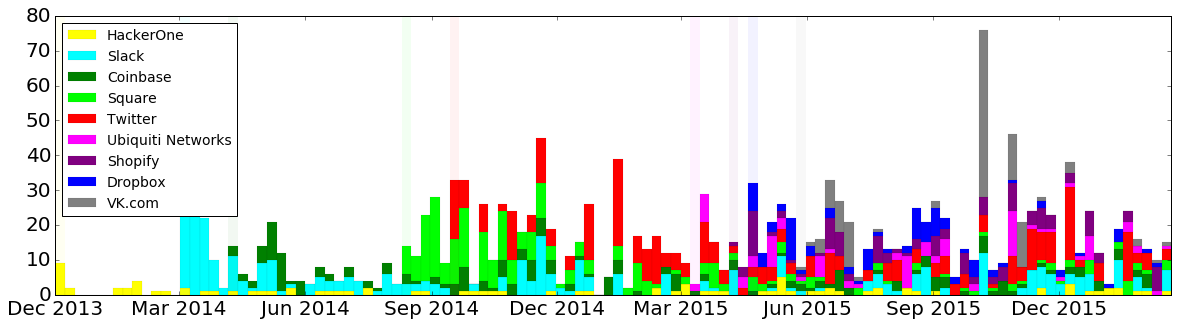

In [30]:
plotTimeline(df)

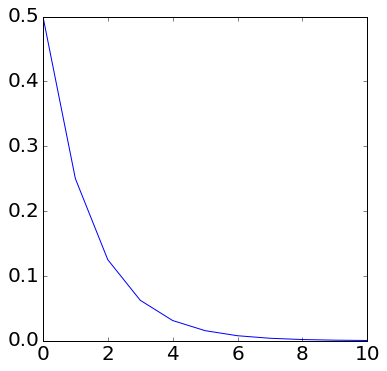

In [115]:
x = [2]
y = [1./2]
for i in range(10):
    x = np.append(x,x[-1]*2)
    y = np.append(y,y[-1]/2.)

pl.plot(y)